<a href="https://colab.research.google.com/github/GaneshiUmayangana/BreastCancer-Prediction/blob/main/method_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Loading Data Set

In [ ]:
data_set = pd.read_csv("data.csv")
data_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data_set['diagnosis'] = data_set['diagnosis'].replace({'M':1,'B':0})

# Basic Details of Data Set

In [ ]:
data_set.shape

(569, 33)

In [ ]:
data_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data_set.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data_set.duplicated().sum()

0

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data_set['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
data_set = data_set.drop(['id','Unnamed: 32'],axis=1)

In [ ]:
data_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_set.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Splitting the dataset

In [ ]:
y = data_set['diagnosis']

In [ ]:
X = data_set.drop('diagnosis',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182


In [ ]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.360,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.01553,0.1718,0.05780,...,12.570,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576
429,12.720,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.01835,0.1459,0.05544,...,13.820,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.01638,0.1847,0.06019,...,13.450,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121
323,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.15040,0.2569,0.06670,...,25.300,31.86,171.10,1938.0,0.1592,0.44920,0.53440,0.26850,0.5558,0.10240


In [ ]:
y_train

567    1
295    0
91     1
1      1
94     1
      ..
369    1
320    0
527    0
125    0
265    1
Name: diagnosis, Length: 455, dtype: int64

In [ ]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400,1
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,0
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,1
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574,1
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,0
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,0
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,0


In [ ]:
train_set.shape

(455, 31)

In [ ]:
test_set = pd.concat([X_test,y_test],axis=1)
test_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,0
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,0
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614,1
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576,0
429,12.720,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.01835,0.1459,0.05544,...,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025,0
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,0
323,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.15040,0.2569,0.06670,...,31.86,171.10,1938.0,0.1592,0.44920,0.53440,0.26850,0.5558,0.10240,1


In [ ]:
test_set.shape

(114, 31)

# Plots

<Axes: >

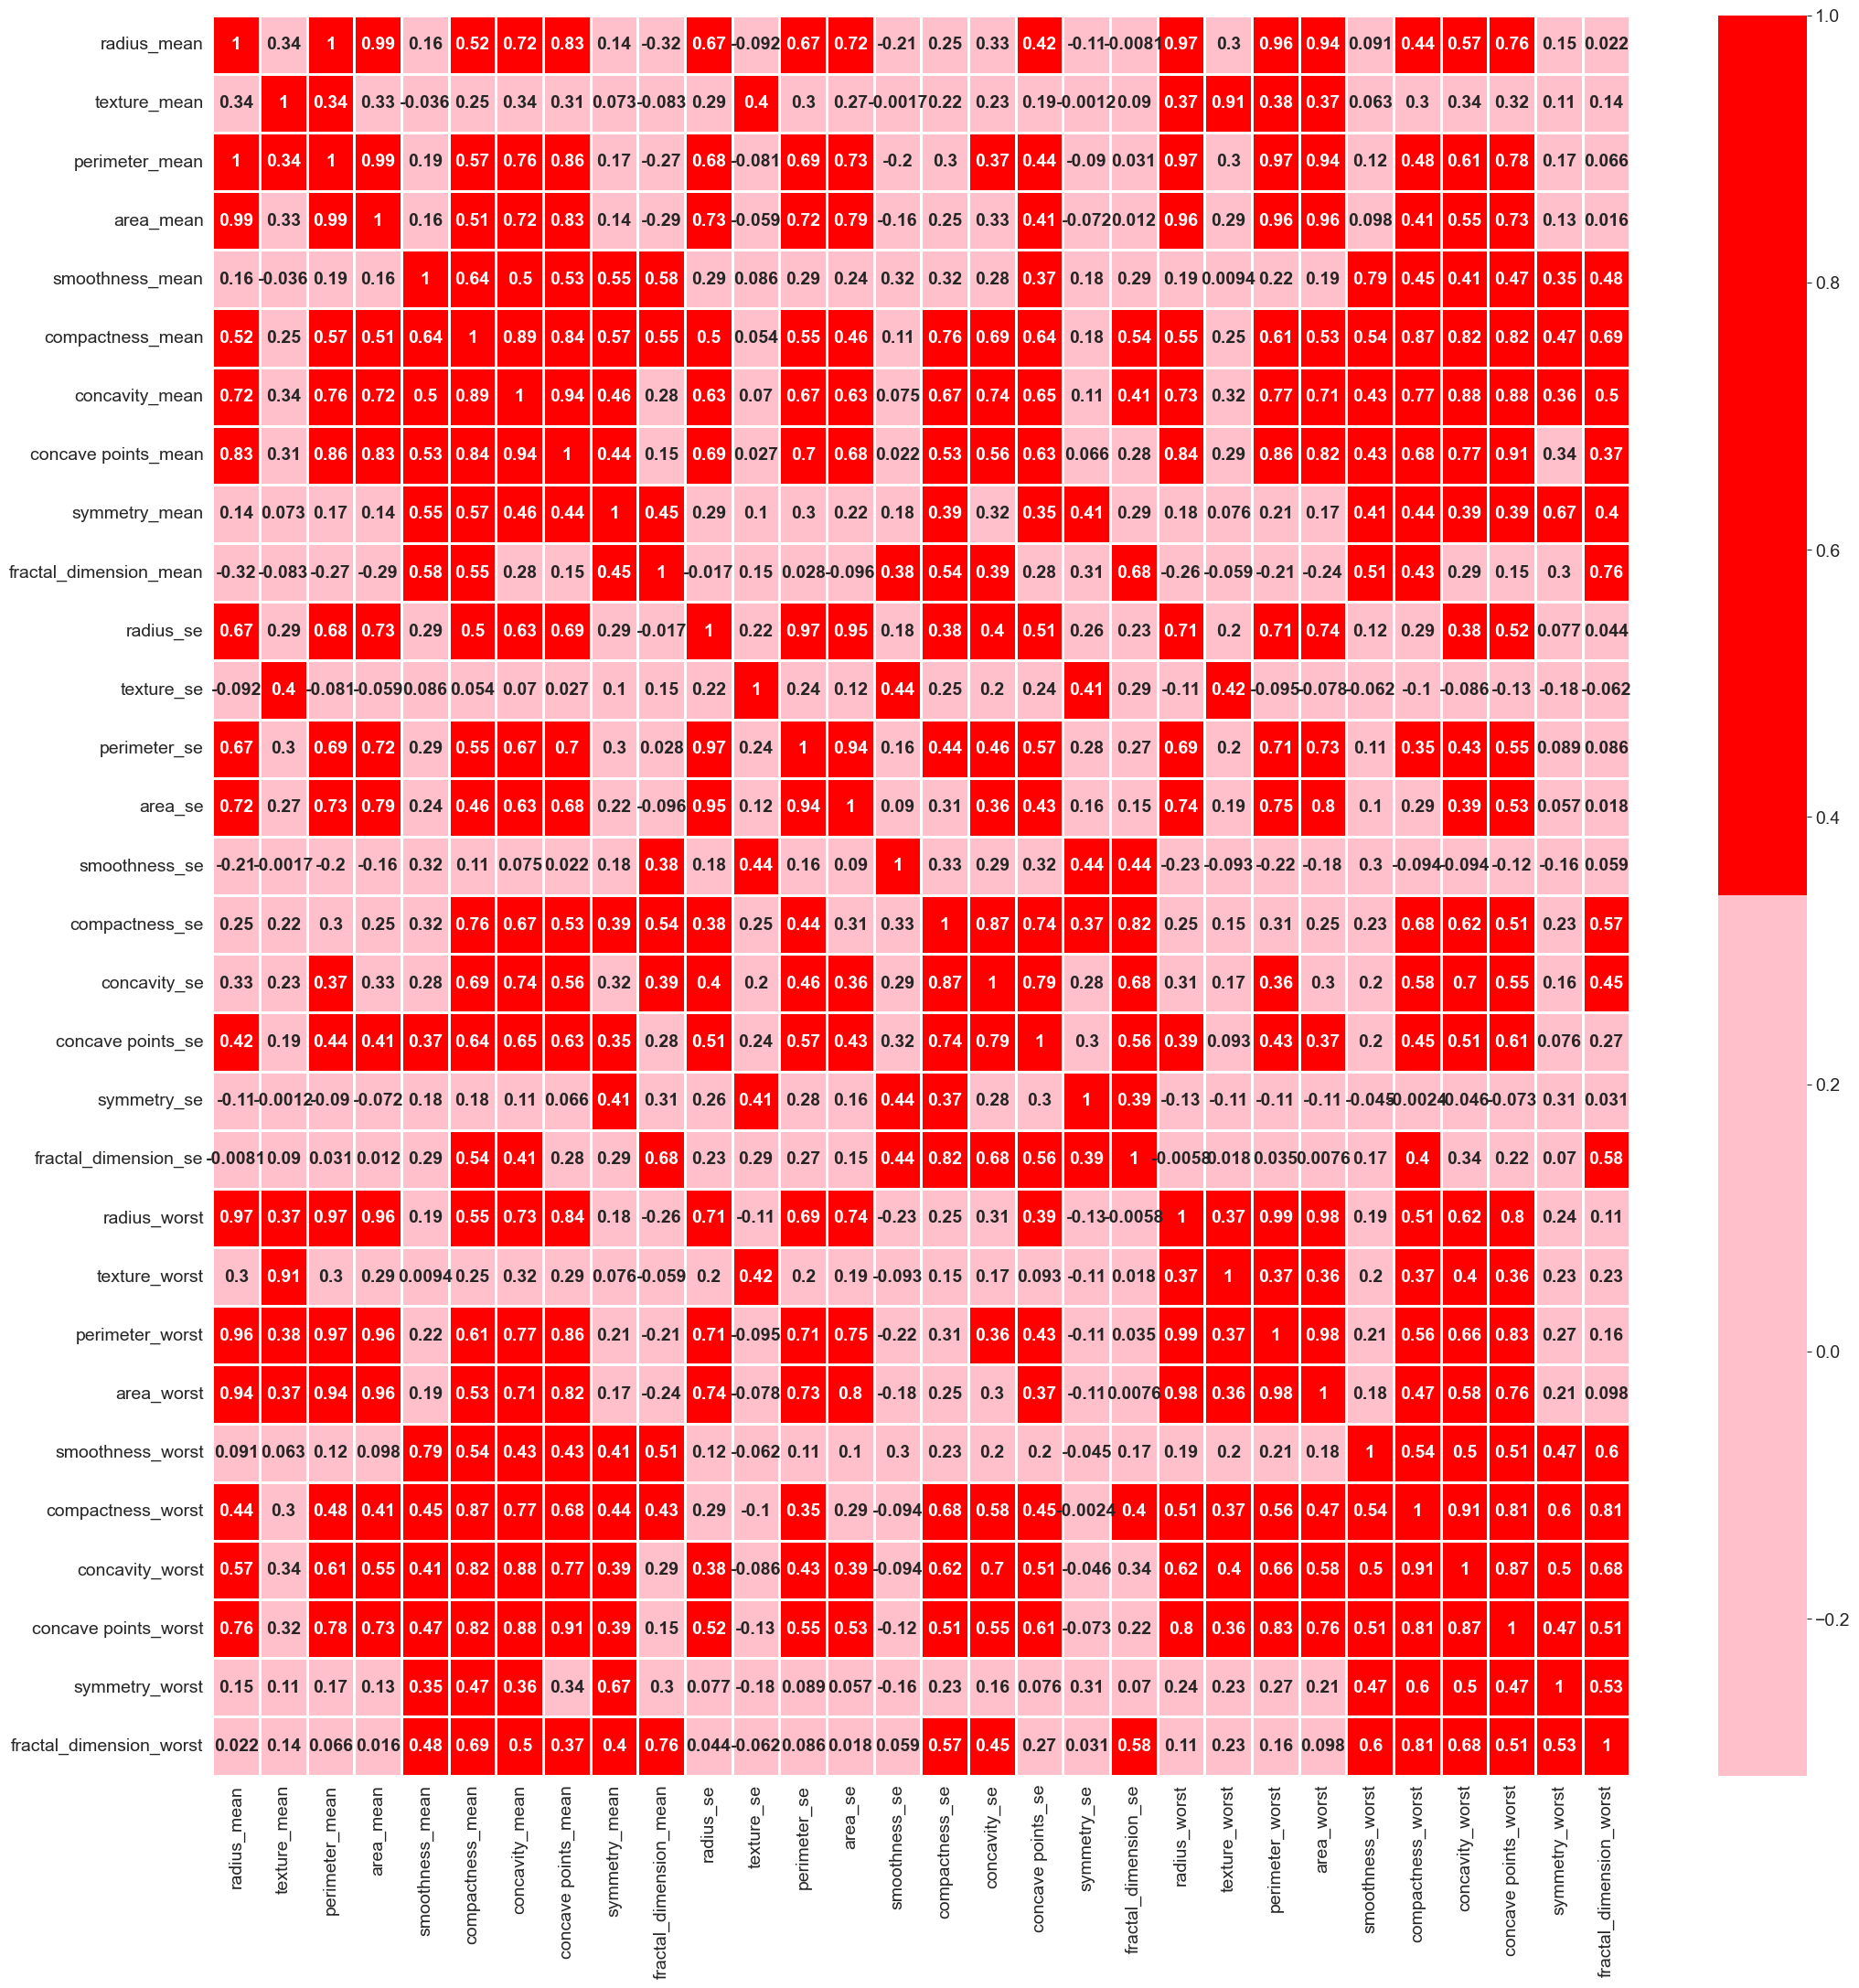

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(25, 25))
custom_cmap = ListedColormap(['pink','red'])
sns.heatmap(X_train.corr(),cmap=custom_cmap, linewidths=2, linecolor='white', annot=True,annot_kws={"weight": "bold"})

<Axes: xlabel='diagnosis', ylabel='count'>

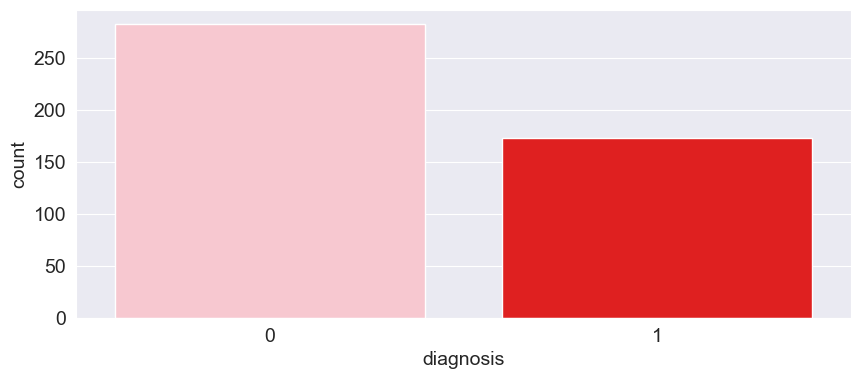

In [ ]:
palette_colors = ['pink', 'red']
plt.ylabel('Frequency')
sns.countplot(x='diagnosis', data=train_set,palette=palette_colors)

#  K-Mean Cluster method to observe Clusters

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

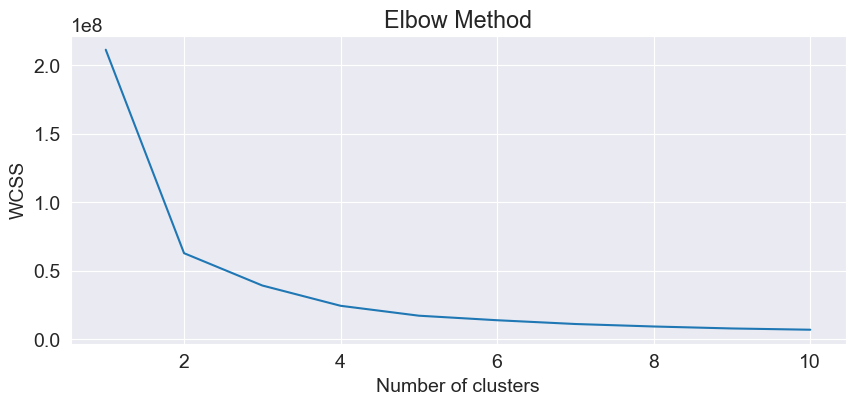

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=10, n_init=25, algorithm='lloyd')
kmeans2.fit(X_train)

zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [1.94984259e+01 2.17719444e+01 1.29103704e+02 1.19993889e+03
 1.01687130e-01 1.51232870e-01 1.81402963e-01 1.02488704e-01
 1.90848148e-01 6.06512963e-02 7.45559259e-01 1.19759630e+00
 5.28892593e+00 9.64718519e+01 6.62791667e-03 3.30583611e-02
 4.30062963e-02 1.57911759e-02 2.01201852e-02 4.06248148e-03
 2.38250926e+01 2.88341667e+01 1.59475926e+02 1.76526852e+03
 1.40583333e-01 3.71033333e-01 4.62454630e-01 1.94886111e-01
 3.11280556e-01 8.72699074e-02] 
 Cluster 1 : [1.26083516e+01 1.84282709e+01 8.15057637e+01 4.99977522e+02
 9.54824784e-02 9.24949856e-02 6.22508349e-02 3.41233256e-02
 1.78387320e-01 6.35830259e-02 3.09046974e-01 1.20906427e+00
 2.19687493e+00 2.42514496e+01 7.22414121e-03 2.33285130e-02
 2.75069412e-02 1.07138963e-02 2.04316657e-02 3.70232075e-03
 1.41215331e+01 2.45561383e+01 9.25465130e+01 6.25592795e+02
 1.30819914e-01 2.24629597e-01 2.17511086e-01 9.26103775e-02
 2.83655620e-01 8.33293948e-02] 
 
 Clustering vector: 
 [0 1 1 0 1

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


E:\applications\Anaconda\files\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


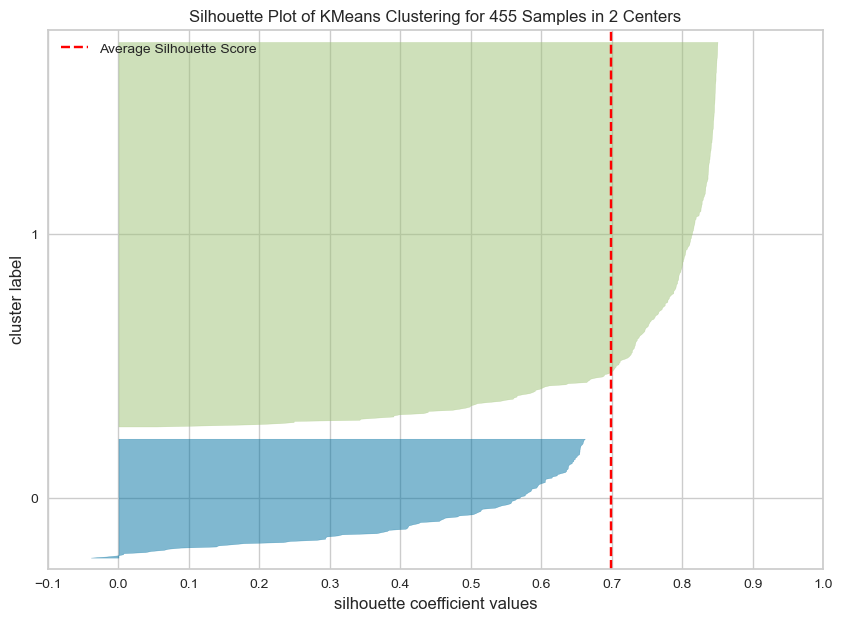

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 455 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25, random_state=10))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2, X_train, colors='yellowbrick')

# Clustering


In [ ]:
df = pd.DataFrame(train_set)


In [ ]:
cluster_0_df = df[kmeans2.labels_ == 0]
cluster_1_df = df[kmeans2.labels_ == 1]

In [ ]:
cluster_0_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
567,20.60,29.33,140.1,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,0.07016,...,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
118,15.78,22.91,105.7,782.6,0.11550,0.17520,0.2133,0.09479,0.2096,0.07331,...,30.50,130.3,1272.0,0.1855,0.4925,0.7356,0.2034,0.3274,0.12520,1
181,21.09,26.57,142.7,1311.0,0.11410,0.28320,0.2487,0.14960,0.2395,0.07398,...,33.48,176.5,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840,1
72,17.20,24.52,114.2,929.4,0.10710,0.18300,0.1692,0.07944,0.1927,0.06487,...,33.82,151.6,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,17.46,39.28,113.4,920.6,0.09812,0.12980,0.1417,0.08811,0.1809,0.05966,...,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496,1
256,19.55,28.77,133.6,1207.0,0.09260,0.20630,0.1784,0.11440,0.1893,0.06232,...,36.27,178.6,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050,1
156,17.68,20.74,117.4,963.7,0.11150,0.16650,0.1855,0.10540,0.1971,0.06166,...,25.11,132.9,1302.0,0.1418,0.3498,0.3583,0.1515,0.2463,0.07738,1
369,22.01,21.90,147.2,1482.0,0.10630,0.19540,0.2448,0.15010,0.1824,0.06140,...,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,1


In [ ]:
cluster_0_df['diagnosis'].value_counts()

1    108
Name: diagnosis, dtype: int64

In [ ]:
cluster_0_df.duplicated().sum()

0

In [ ]:
cluster_0_df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [ ]:
cluster_1_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,0
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828,1
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234,1
403,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.18100,0.08388,0.3297,0.07834,0
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.76,109.80,928.2,0.1354,0.1361,0.19470,0.13570,0.2300,0.07230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330,0
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006,0
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,0
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,0


In [ ]:
cluster_1_df['diagnosis'].value_counts()

0    282
1     65
Name: diagnosis, dtype: int64

In [ ]:
cluster_1_df.duplicated().sum()

0

In [ ]:
cluster_1_df.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

# Cluster 0

In [ ]:
y_c0 = cluster_0_df['diagnosis']
X_c0 = cluster_0_df.drop('diagnosis',axis=1)

In [ ]:
X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(X_c0, y_c0 , test_size=0.2, random_state=10)

In [ ]:
X_train_c0

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
87,19.02,24.59,122.0,1076.0,0.09029,0.12060,0.14680,0.08271,0.1953,0.05629,...,24.56,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.1956,0.3956,0.09288
119,17.95,20.01,114.2,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.58,27.83,129.2,1261.0,0.1072,0.1202,0.2249,0.1185,0.4882,0.06111
393,21.61,22.28,144.4,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070
127,19.00,18.91,123.4,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,...,22.32,25.73,148.2,1538.0,0.1021,0.2264,0.3207,0.1218,0.2841,0.06541
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
180,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
389,19.55,23.21,128.9,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,0.05884,...,20.82,30.44,142.0,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602
321,20.16,19.66,131.1,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.06,23.03,150.2,1657.0,0.1054,0.1537,0.2606,0.1425,0.3055,0.05933


In [ ]:
X_test_c0

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
503,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277
237,20.48,21.46,132.5,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,24.22,26.17,161.7,1750.0,0.1228,0.2311,0.3158,0.1445,0.2238,0.07127
168,17.47,24.68,116.1,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,0.06365,...,23.14,32.33,155.3,1660.0,0.1376,0.3830,0.4890,0.1721,0.2160,0.09300
498,18.49,17.52,121.3,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.75,22.88,146.4,1600.0,0.1412,0.3089,0.3533,0.1663,0.2510,0.09445
33,19.27,26.47,127.9,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,24.15,30.90,161.4,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230
219,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,...,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
42,19.07,24.81,128.3,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380
563,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
277,18.81,19.98,120.9,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,19.96,24.30,129.0,1236.0,0.1243,0.1160,0.2210,0.1294,0.2567,0.05737
18,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615


 # Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc_c0 = sc.fit_transform(X_train_c0)
X_test_sc_c0 = sc.transform(X_test_c0)

# Random Forest

In [ ]:
random_forest_model_c0 = RandomForestClassifier(random_state=10)

In [ ]:
random_forest_model_c0.fit(X_train_c0, y_train_c0)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred_rf_c0 = random_forest_model_c0.predict(X_test_c0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_rf_c0 = accuracy_score(y_test_c0, y_pred_rf_c0)
accuracy_rf_c0

1.0

In [ ]:
conf_matrix_rf_c0= confusion_matrix(y_test_c0, y_pred_rf_c0)
print("Confusion Matrix:")
print(conf_matrix_rf_c0)

Confusion Matrix:
[[22]]


# Cluster 1

In [ ]:
y_c1 = cluster_1_df['diagnosis']
X_c1 = cluster_1_df.drop('diagnosis',axis=1)

In [ ]:
X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(X_c1, y_c1 , test_size=0.2, random_state=10)

In [ ]:
X_train_c1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
170,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,0.05955,...,13.500,15.64,86.97,549.1,0.13850,0.12660,0.124200,0.09391,0.2827,0.06771
196,13.770,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.065260,0.1834,0.06877,...,16.390,34.01,111.60,806.9,0.17370,0.31220,0.380900,0.16730,0.3080,0.09333
276,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,0.05821,...,12.200,18.99,77.37,458.0,0.12590,0.07348,0.004955,0.01111,0.2758,0.06386
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.000000,0.000000,0.1985,0.07098,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.000000,0.00000,0.2445,0.08865
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.156400,0.06019,0.2350,0.07014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.203000,0.085200,0.1807,0.07083,...,17.110,36.33,117.70,909.4,0.17320,0.49670,0.591100,0.21630,0.3013,0.10670
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.090520,0.1876,0.06684,...,18.550,25.09,126.90,1031.0,0.13650,0.47060,0.502600,0.17320,0.2770,0.10630
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,16.760,31.55,110.20,867.1,0.10770,0.33450,0.311400,0.13080,0.3163,0.09251
381,11.040,14.93,70.67,372.7,0.07987,0.07079,0.035460,0.020740,0.2003,0.06246,...,12.090,20.83,79.73,447.1,0.10950,0.19820,0.155300,0.06754,0.3202,0.07287


In [ ]:
X_test_c1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,...,17.090,33.47,111.80,888.3,0.18510,0.40610,0.40240,0.17160,0.3383,0.10310
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,0.1885,0.06201,...,11.250,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.019740,0.013130,0.1935,0.05878,...,12.440,31.62,81.39,476.5,0.09545,0.13610,0.07239,0.04815,0.3244,0.06745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,12.56,19.07,81.92,485.8,0.08760,0.10380,0.103000,0.043910,0.1533,0.06184,...,13.370,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188
224,13.27,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.024560,0.1496,0.05674,...,15.140,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.080070,0.042230,0.1912,0.06412,...,16.670,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764
395,14.06,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.032510,0.1641,0.05764,...,14.920,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc_c1 = sc.fit_transform(X_train_c1)
X_test_sc_c1 = sc.transform(X_test_c1)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')
logi_model.fit(X_train_sc_c1 ,y_train_c1)

LogisticRegression(multi_class='ovr', random_state=10, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_test_c1 = logi_model.predict(X_test_sc_c1)

In [ ]:
accuracy_c1 = accuracy_score(y_test_c1, y_pred_test_c1,normalize=True)
print("Accuracy:", accuracy_c1)

Accuracy: 0.9714285714285714


In [ ]:
conf_matrix_c1 = confusion_matrix(y_test_c1, y_pred_test_c1)
print("Confusion Matrix:")
print(conf_matrix_c1)

Confusion Matrix:
[[61  2]
 [ 0  7]]


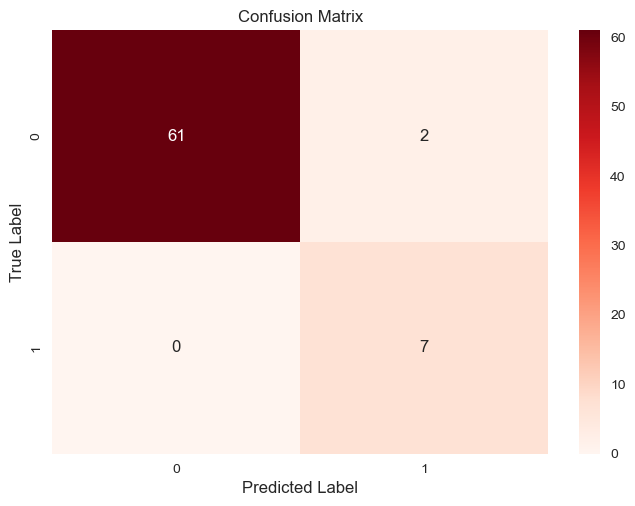

In [ ]:
sns.heatmap(conf_matrix_c1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test_c1,y_pred_test_c1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.78      1.00      0.88         7

    accuracy                           0.97        70
   macro avg       0.89      0.98      0.93        70
weighted avg       0.98      0.97      0.97        70



# KNN


In [ ]:
knn_model_c1 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model_c1.fit(X_train_sc_c1, y_train_c1)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn_c1 = knn_model_c1.predict(X_test_sc_c1)

In [ ]:
accuracy_knn_c1 = accuracy_score(y_test_c1, y_pred_knn_c1)
accuracy_knn_c1

0.9714285714285714

In [ ]:
conf_matrix_knn_c1 = confusion_matrix(y_test_c1, y_pred_knn_c1)
print("Confusion Matrix:")
print(conf_matrix_knn_c1)

Confusion Matrix:
[[63  0]
 [ 2  5]]


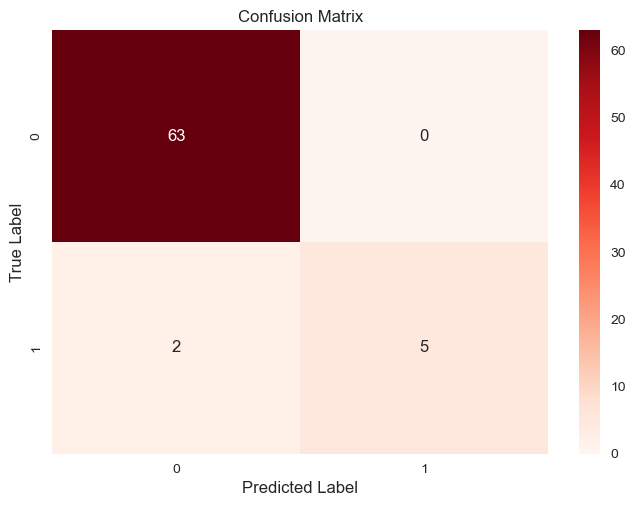

In [ ]:
sns.heatmap(conf_matrix_knn_c1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test_c1,y_pred_knn_c1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.71      0.83         7

    accuracy                           0.97        70
   macro avg       0.98      0.86      0.91        70
weighted avg       0.97      0.97      0.97        70



# Random Forest

In [ ]:
random_forest_model_c1 = RandomForestClassifier(random_state=10)

In [ ]:
random_forest_model_c1.fit(X_train_c1, y_train_c1)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred_rf_c1 = random_forest_model_c1.predict(X_test_c1)

In [ ]:
accuracy_rf_c1 = accuracy_score(y_test_c1, y_pred_rf_c1)
accuracy_rf_c1

0.9285714285714286

In [ ]:
conf_matrix_rf_c1 = confusion_matrix(y_test_c1, y_pred_rf_c1)
print("Confusion Matrix:")
print(conf_matrix_rf_c1)

Confusion Matrix:
[[62  1]
 [ 4  3]]


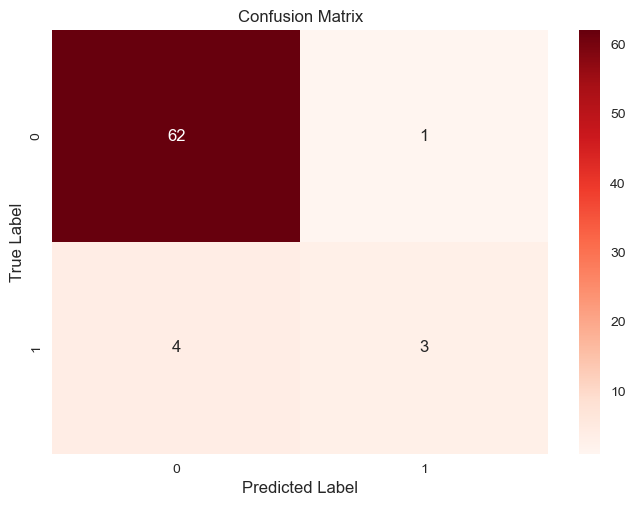

In [ ]:
sns.heatmap(conf_matrix_rf_c1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test_c1,y_pred_rf_c1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.75      0.43      0.55         7

    accuracy                           0.93        70
   macro avg       0.84      0.71      0.75        70
weighted avg       0.92      0.93      0.92        70



# XG Boost

In [ ]:
xgb_model_c1 = xgb.XGBClassifier(random_state=10)

In [ ]:
xgb_model_c1.fit(X_train_c1, y_train_c1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred_xgb_c1 = xgb_model_c1.predict(X_test_c1)

In [ ]:
accuracy_xgb_c1 = accuracy_score(y_test_c1, y_pred_xgb_c1)
accuracy_xgb_c1

0.9714285714285714

In [ ]:
conf_matrix_xgb_c1 = confusion_matrix(y_test_c1, y_pred_xgb_c1)
print("Confusion Matrix:")
print(conf_matrix_xgb_c1)

Confusion Matrix:
[[63  0]
 [ 2  5]]


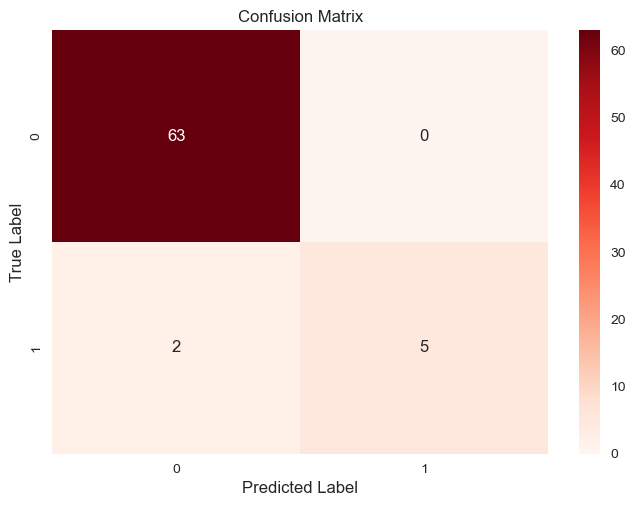

In [ ]:
sns.heatmap(conf_matrix_xgb_c1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Performance Comparisson

In [ ]:
result_c1 = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression', 'KNN', 'XGBoostClassifier'],
    'Score': [accuracy_rf_c1, accuracy_c1, accuracy_knn_c1, accuracy_xgb_c1]
})
result_c1


,Algorithm,Score
0,RandomForestClassifier,0.928571
1,LogisticRegression,0.971429
2,KNN,0.971429
3,XGBoostClassifier,0.971429


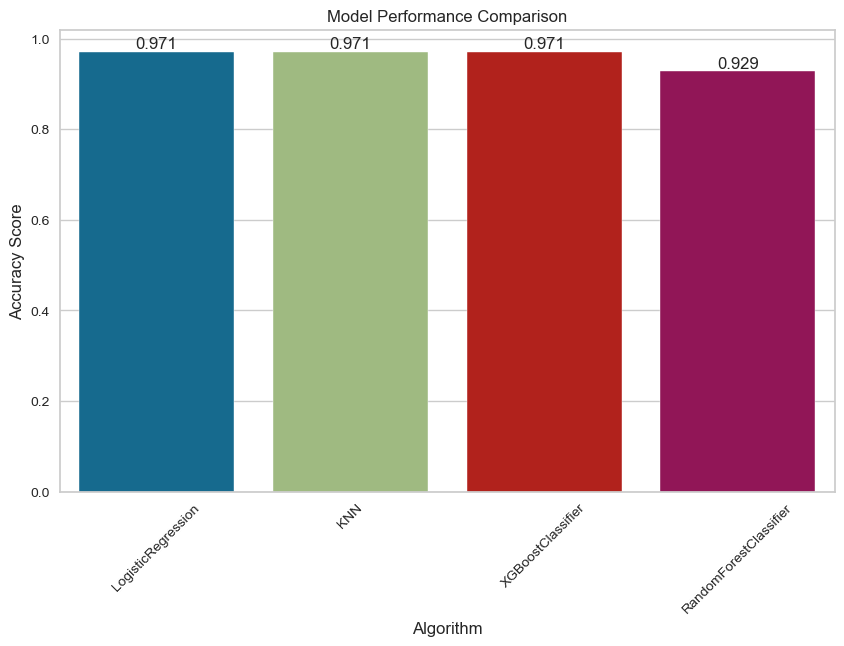

In [ ]:
result_c1.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Algorithm', y='Score', data=result_c1, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result_c1.Algorithm, rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

# Selcting best model using xgboost and logistic regression by checking time

In [ ]:
import time

## TIME FOR LOGISTIC REGRESSION

In [ ]:
start_time_lr = time.time()
logi_model = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')
logi_model.fit(X_train_sc_c1 ,y_train_c1)
end_time_lr = time.time()
evaluation_time_lr = end_time_lr - start_time_lr
evaluation_time_lr

0.006426811218261719

## TIME FOR XG BOOST

In [ ]:
start_time_xgb = time.time()
xgb_model_c1 = xgb.XGBClassifier(random_state=10)
xgb_model_c1.fit(X_train_c1, y_train_c1)
end_time_xgb = time.time()
evaluation_time_xgb = end_time_xgb - start_time_xgb
evaluation_time_xgb

0.10493803024291992

# Applying Clustering for test set

In [ ]:
kmeans2_test = KMeans(n_clusters=2, random_state=10, n_init=25, algorithm='lloyd')
kmeans2_test.fit(X_test)

zero = []
one = []
for i in kmeans2_test.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2_test.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2_test.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2_test.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2_test.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [1.862760e+01 2.153080e+01 1.225560e+02 1.097492e+03 9.870600e-02
 1.279220e-01 1.476064e-01 8.826720e-02 1.920080e-01 5.936880e-02
 6.742720e-01 1.249640e+00 4.639720e+00 8.474960e+01 6.161240e-03
 2.704856e-02 3.864560e-02 1.442660e-02 2.090360e-02 3.341680e-03
 2.282400e+01 2.931920e+01 1.510720e+02 1.648640e+03 1.388896e-01
 2.917104e-01 3.889600e-01 1.773028e-01 3.159360e-01 8.060640e-02] 
 Cluster 1 : [1.22675393e+01 1.90062921e+01 7.91098876e+01 4.73134831e+02
 9.26597753e-02 8.70006742e-02 6.34167528e-02 3.05476404e-02
 1.77178652e-01 6.33030337e-02 2.91307865e-01 1.26138090e+00
 2.03679888e+00 2.24589326e+01 7.07521348e-03 2.42196629e-02
 3.36156854e-02 1.04288539e-02 2.13843820e-02 3.95848315e-03
 1.36324382e+01 2.51942697e+01 8.89639326e+01 5.85461798e+02
 1.26606517e-01 2.17595281e-01 2.21683146e-01 8.53356180e-02
 2.82110112e-01 8.32534831e-02] 
 
 Clustering vector: 
 [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
df1 = pd.DataFrame(test_set)

In [ ]:
cluster_0_df1 = df1[kmeans2_test.labels_ == 0]
cluster_1_df1 = df1[kmeans2_test.labels_ == 1]

In [ ]:
cluster_0_df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
370,16.35,23.29,109.0,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,31.03,129.3,1165.0,0.14150,0.46650,0.7087,0.22480,0.4824,0.09614,1
264,17.19,22.07,111.6,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,29.33,140.5,1436.0,0.15580,0.25670,0.3889,0.19840,0.3216,0.07570,1
566,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.7,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,1
253,17.30,17.08,113.0,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,25.09,130.9,1222.0,0.14160,0.24050,0.3378,0.18570,0.3138,0.08113,1
491,17.85,13.23,114.6,992.1,0.07838,0.06217,0.04445,0.04178,0.1220,0.05243,...,18.42,127.1,1210.0,0.09862,0.09976,0.1048,0.08341,0.1783,0.05871,0
433,18.82,21.97,123.7,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,...,30.93,145.3,1603.0,0.13900,0.34630,0.3912,0.17080,0.3007,0.08314,1
282,19.40,18.18,127.2,1145.0,0.10370,0.14420,0.16260,0.09464,0.1893,0.05892,...,28.65,152.4,1628.0,0.15180,0.37490,0.4316,0.22520,0.3590,0.07787,1
533,20.47,20.67,134.7,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,0.05419,...,27.15,152.0,1645.0,0.10970,0.25340,0.3092,0.16130,0.3220,0.06386,1
280,19.16,26.60,126.2,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,35.90,159.8,1724.0,0.17820,0.38410,0.5754,0.18720,0.3258,0.09720,1
24,16.65,21.38,110.0,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,31.56,177.0,2215.0,0.18050,0.35780,0.4695,0.20950,0.3613,0.09564,1


In [ ]:
cluster_1_df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,0
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,0
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,0
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.1292,0.27720,0.82160,0.15710,0.3108,0.12590,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.00000,0.1903,0.06422,...,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151,0
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.017680,0.01915,0.1910,0.06908,...,22.84,71.94,375.6,0.1406,0.14400,0.06572,0.05575,0.3055,0.08797,0
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576,0
429,12.720,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.01835,0.1459,0.05544,...,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025,0


In [ ]:
cluster_1_df1['diagnosis'].value_counts()

0    74
1    15
Name: diagnosis, dtype: int64

In [ ]:
cluster_0_df1['diagnosis'].value_counts()

1    24
0     1
Name: diagnosis, dtype: int64

In [ ]:
X_test_final = cluster_1_df1.drop('diagnosis',axis=1)

In [ ]:
y_test_final = cluster_1_df1['diagnosis']

### For Cluster 0  -> 1 OR M this will lead some problems since in this test set we have one obseravtion diagnosis as 0 or no cancer tumer but still it labeld as M / 1 or as cancer patient


In [ ]:
logi_model_c1_f = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')

In [ ]:
logi_model_c1_f.fit(X_train_sc_c1 ,y_train_c1)

LogisticRegression(multi_class='ovr', random_state=10, solver='liblinear')

In [ ]:
y_pred_xgb_c1_f = xgb_model_c1.predict(X_test_final)

In [ ]:
accuracy_xgb_c1_f = accuracy_score(y_test_final, y_pred_xgb_c1_f)
accuracy_xgb_c1_f

0.9662921348314607

In [ ]:
conf_matrix_xgb_c1_f = confusion_matrix(y_test_final, y_pred_xgb_c1_f)
print("Confusion Matrix:")
print(conf_matrix_xgb_c1_f)

Confusion Matrix:
[[73  1]
 [ 2 13]]


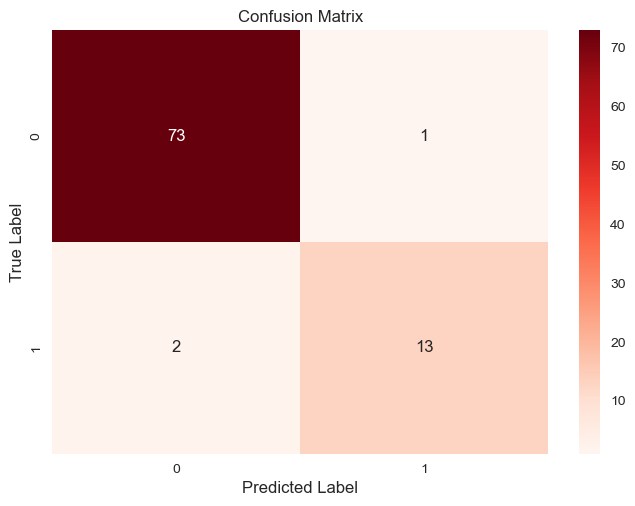

In [ ]:
sns.heatmap(conf_matrix_xgb_c1_f, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 ### This is the final model for cluster 1 ,we can use logistic regreesin as well since the accuracies are eqaul

# Find the most important features from final model

In [ ]:
feature_importance = pd.Series(abs(logi_model_c1_f.coef_[0]), index=X_train.columns)
feature_importance_normalized = (feature_importance / feature_importance.sum()).sort_values(ascending=False)


In [ ]:
print("Feature importance:")
print(feature_importance_normalized)

Feature importance:
area_worst                 0.079386
area_se                    0.078625
compactness_se             0.065927
texture_worst              0.064469
concavity_mean             0.061568
concavity_worst            0.058648
symmetry_worst             0.049269
radius_se                  0.048863
fractal_dimension_se       0.047971
compactness_mean           0.043215
concave points_mean        0.039844
radius_worst               0.038329
symmetry_se                0.036145
fractal_dimension_worst    0.033988
smoothness_worst           0.031790
concave points_worst       0.028365
symmetry_mean              0.026189
perimeter_worst            0.022612
radius_mean                0.022243
smoothness_se              0.020842
perimeter_mean             0.019486
texture_mean               0.015872
concave points_se          0.015642
texture_se                 0.013892
perimeter_se               0.010963
compactness_worst          0.010773
smoothness_mean            0.005305
concavit

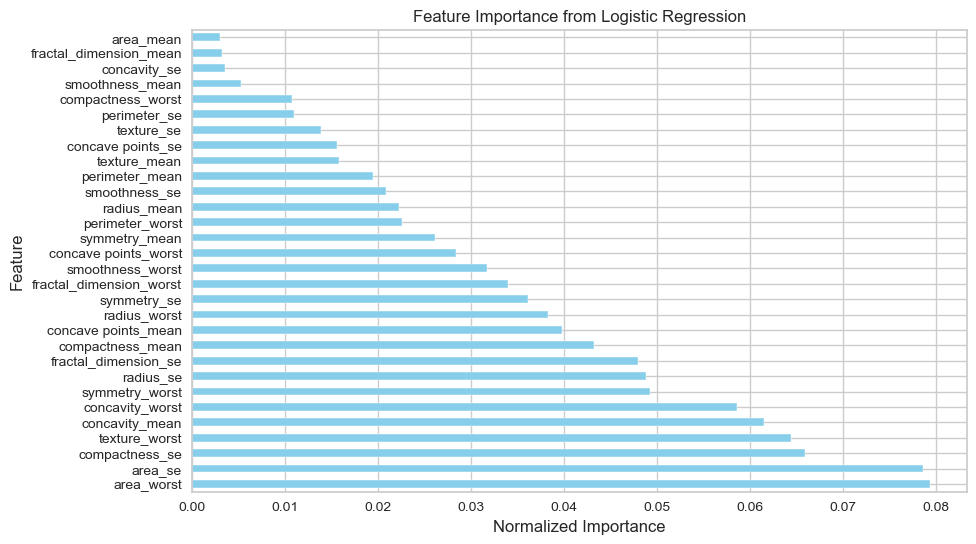

In [ ]:
plt.figure(figsize=(10, 6))
feature_importance_normalized.plot(kind='barh', color='skyblue')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()

# Creating models ignoring clusters

## Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc_f = sc.fit_transform(X_train)
X_test_sc_f = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')
logi_model.fit(X_train_sc_f ,y_train)

LogisticRegression(multi_class='ovr', random_state=10, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_test = logi_model.predict(X_test_sc_f)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test,normalize=True)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[73  2]
 [ 2 37]]


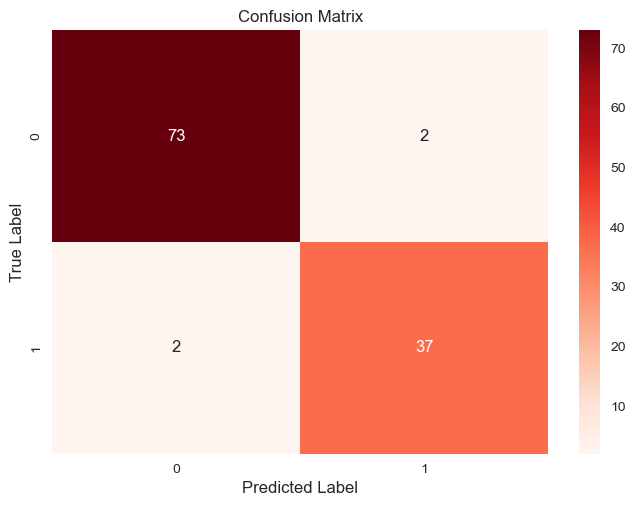

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# KNN Model


In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9210526315789473

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

Confusion Matrix:
[[71  4]
 [ 5 34]]


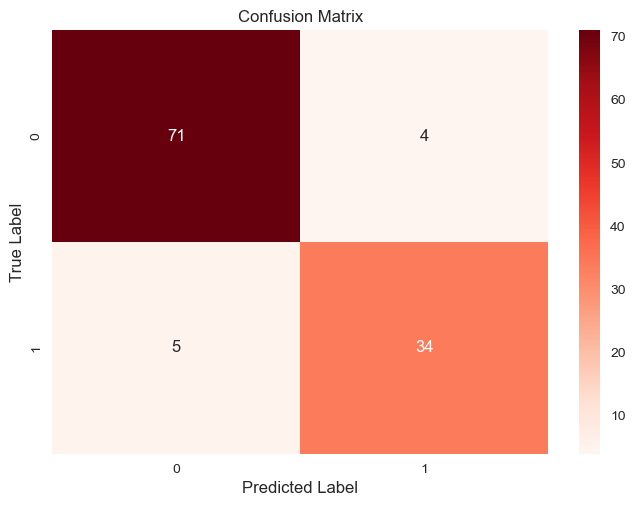

In [ ]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        75
           1       0.89      0.87      0.88        39

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# Random Forest Model

In [ ]:
random_forest_model = RandomForestClassifier(random_state=10)

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9824561403508771

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[73  2]
 [ 0 39]]


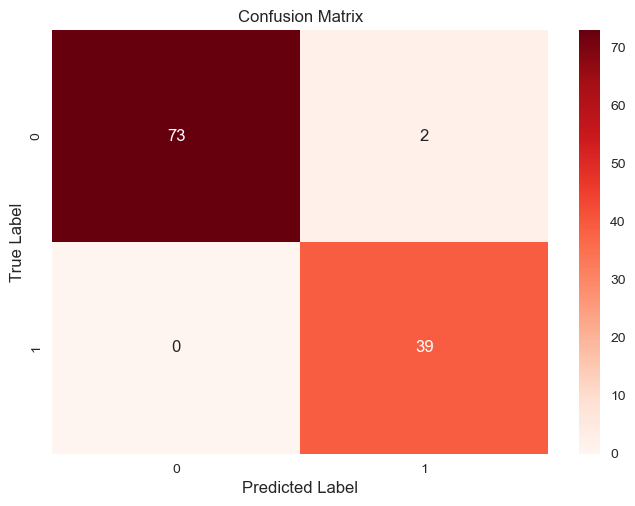

In [ ]:
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



# XG Boost method

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=10)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9649122807017544

In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

Confusion Matrix:
[[73  2]
 [ 2 37]]


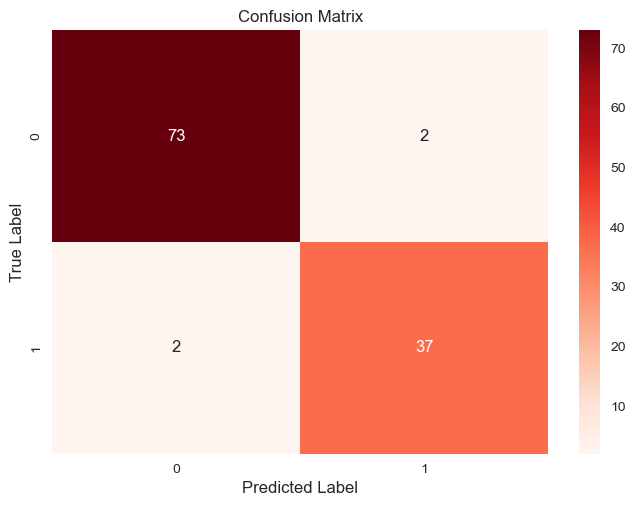

In [ ]:
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Performance Comparisson

In [ ]:
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression', 'KNN', 'XGBoostClassifier'],
    'Score': [accuracy_rf, accuracy, accuracy_knn, accuracy_xgb]
})

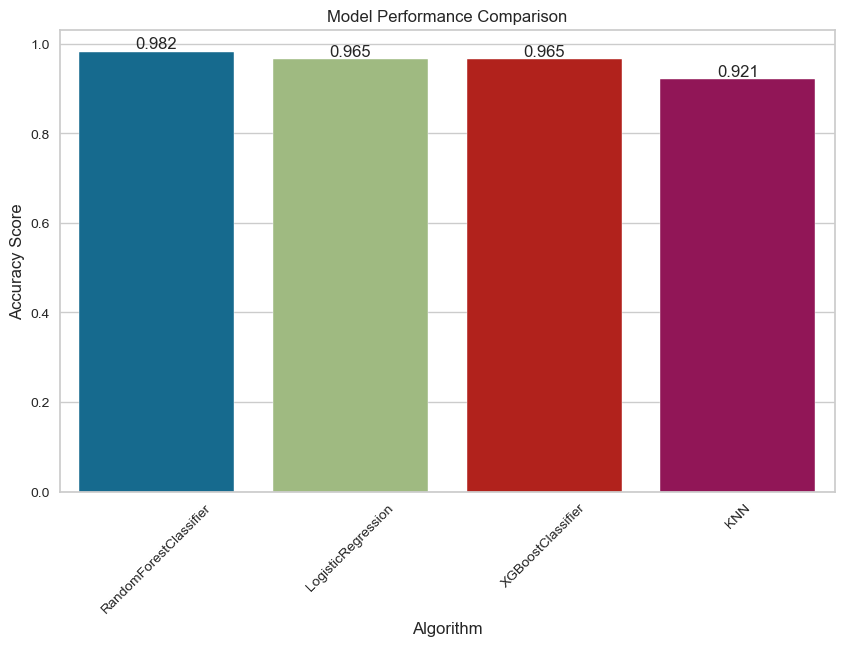

In [ ]:
result.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

# Find the most important features from final model

In [ ]:
import random
np.random.seed(10)
random.seed(10)

In [ ]:
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
sorted_indices = feature_importance.argsort()[::-1]

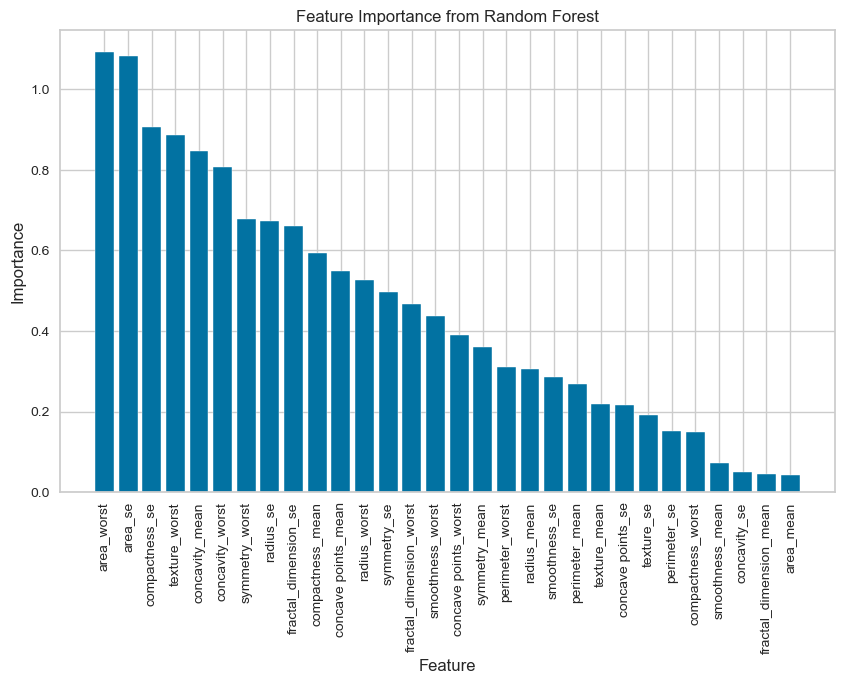

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier())),
    ('classification', RandomForestClassifier())
])

In [ ]:
param_grid = {
    'feature_selection__estimator__max_features': ['auto', 'sqrt', 'log2'],
    'classification__n_estimators': [500, 1000, 1500],
    'classification__max_depth': [None, 10, 20]
}

In [ ]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

E:\applications\Anaconda\files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

E:\applications\Anaconda\files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier())),
                                       ('classification',
                                        RandomForestClassifier())]),
             param_grid={'classification__max_depth': [None, 10, 20],
                         'classification__n_estimators': [500, 1000, 1500],
                         'feature_selection__estimator__max_features': ['auto',
                                                                        'sqrt',
                                                                        'log2']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Best parameters: {'classification__max_depth': 10, 'classification__n_estimators': 1000, 'feature_selection__estimator__max_features': 'sqrt'}
Best cross-validation accuracy: 0.9383931683513419


In [ ]:
best_estimator = grid_search.best_estimator_

In [ ]:
feature_selection_step = best_estimator.named_steps['feature_selection']

In [ ]:
selected_feature_indices = feature_selection_step.get_support(indices=True)

In [ ]:
selected_features = X_train.columns[selected_feature_indices]

In [ ]:
print("Selected features:", selected_features)

Selected features: Index(['radius_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


# Final Model

In [ ]:
np.random.seed(10)
random.seed(10)

In [ ]:
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

In [ ]:
classifier_params = best_estimator.named_steps['classification'].get_params()
classifier_params.pop('random_state',None)

In [ ]:
rf_model_selected = RandomForestClassifier(random_state=10, **classifier_params)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=10)

In [ ]:
test_accuracy_selected = rf_model_selected.score(X_test_selected, y_test)
print("Test Accuracy with selected features:", test_accuracy_selected)

Test Accuracy with selected features: 0.9649122807017544


In [ ]:
feature_importances = rf_model_selected.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Final model with selected features:")
print(feature_importance_df)

Final model with selected features:
                Feature  Importance
6       perimeter_worst    0.256572
8  concave points_worst    0.179475
5          radius_worst    0.155297
7            area_worst    0.150715
3   concave points_mean    0.116820
1             area_mean    0.047955
2        concavity_mean    0.033765
4               area_se    0.030668
0           radius_mean    0.028733
